### Design Linked List

Design your implementation of the linked list. You can choose to use a singly or doubly linked list.
A node in a singly linked list should have two attributes: val and next. val is the value of the current node, and next is a pointer/reference to the next node.
If you want to use the doubly linked list, you will need one more attribute prev to indicate the previous node in the linked list. Assume all nodes in the linked list are 0-indexed.

Implement the MyLinkedList class:

- MyLinkedList() Initializes the MyLinkedList object.
- int get(int index) Get the value of the indexth node in the linked list. If the index is invalid, return -1.
- void addAtHead(int val) Add a node of value val before the first element of the linked list. After the insertion, the new node will be the first node of the linked list.
- void addAtTail(int val) Append a node of value val as the last element of the linked list.
- void addAtIndex(int index, int val) Add a node of value val before the indexth node in the linked list. If index equals the length of the linked list, the node will be appended to the end of the linked list. If index is greater than the length, the node will not be inserted.
- void deleteAtIndex(int index) Delete the indexth node in the linked list, if the index is valid.

In [1]:
class Node(object):

    def __init__(self,val):
        self.val = val
        self.next = None


class MyLinkedList(object):

    def __init__(self):
        """
        초기화
        """
        self.head = None
        self.size = 0

    def get(self, index):
        """
        Linked List에서 index에 해당하는 수 반환, 만약 index 일치하지 않을 시 -1 반환
        :type index: int
        :rtype: int
        """
        # 일치 하지 않음
        if index < 0 or index >= self.size:
            return -1

        # 비어 있음
        if self.head is None:
            return -1

        # 포인터 반복
        curr = self.head
        for i in range(index):
            curr = curr.next
        return curr.val

    def addAtHead(self, val):
        """
        Head에 삽입후, 기존 Head 의 head 수정
        :type val: int
        :rtype: void
        """
        node = Node(val)
        node.next = self.head
        self.head = node

        # 크기 증가
        self.size += 1

    def addAtTail(self, val):
        """
        Linked List의 Tail에 요소 추가
        :type val: int
        :rtype: void
        """
        curr = self.head
        # Linked List 비어있을 시
        if curr is None:
            self.head = Node(val)
        else:
            # 포인터 끝으로 이동
            while curr.next is not None:
                curr = curr.next
            curr.next = Node(val)

        self.size += 1

    def addAtIndex(self, index, val):
        """
        해당하는 index에 value 삽입
        If index == linked list 길이, Linked List의 마지막에 추가
        If index > linked list 길이, 추가 안됨
        :type index: int
        :type val: int
        :rtype: void
        """
        if index < 0 or index > self.size:
            return

        # head 에 추가
        if index == 0:
            self.addAtHead(val)
        else:
            curr = self.head
            for i in range(index - 1):
                curr = curr.next
            node = Node(val)
            node.next = curr.next
            curr.next = node

            self.size += 1

    def deleteAtIndex(self, index):
        """
        If index 존재 시, 해당 index 요소 삭제
        :type index: int
        :rtype: void
        """
        if index < 0 or index >= self.size:
            return

        curr = self.head
        # head 삭제
        if index == 0:
            self.head = curr.next
        else:
            for i in range(index - 1):
                curr = curr.next
            curr.next = curr.next.next

        self.size -= 1

### Linked List Cycle

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

- 주어진, linked list에 cycle 이 존재하는지 확인
- pos : tail의 next 의 index이다.
- pos 는 parameter로 주어지지 않는다.

- Example
```python
    Input : head = [3,2,0,-4], pos = 1
    Output : true
```
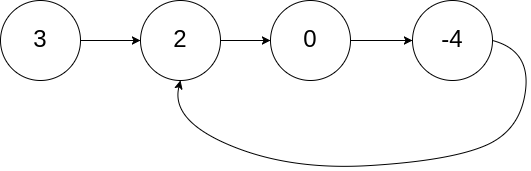

**아이디어**
- 2 pointer 활용
    - slow : head에서 시작, 한칸 씩 이동
    - fast : head.next에서 시작, 두칸 씩 이동
    
    - 두 포인터가 일치할 시, cycle 존재

In [2]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        # 주어진 리스트가 비어있을 시
        if not head:
            return False
        
        slow = head
        fast = head.next
        
        while slow != fast:
            # fast 포인터의 next가 null일시 , cycle 없음
            if not fast or not fast.next:
                return False
            slow = slow.next
            fast = fast.next.next
            
        return True

NameError: name 'Optional' is not defined

### Linked List Cycle 2

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

Do not modify the linked list.

- 주어진 Linked List의 head에 대하여, cycle 의 시작 지점(node)를 반환해라. 
- 만약, cycle이 없을 시, null을 반환하여라.


In [ ]:
class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head :
            return 
        
        tail = head
        
        visited = list()
        
        while tail.next:
            if visited.count(tail) == 0:
                visited.append(tail)
            else:
                return tail
            
            if not tail.next:
                return 
            
            tail = tail.next

### Intersection of Two LinkedLists

Given the heads of two singly linked-lists headA and headB, return the node at which the two lists intersect. If the two linked lists have no intersection at all, return null.

- 주어진 두개의 singly linked list의 head A, head B에 관하여, 교차점을 반환해라.
- 교차점이 없을시, return null

**아이디어**
- A 한칸 이동할 때마다, B 는 처음부터 끝까지 탐색
    - 일치한것 이 있을때, 반환
    - 없을 시, return null

In [ ]:
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        
        if not headA or not headB:
            return
        
        while headA:
            moverB = headB
            
            while moverB:
                if headA == moverB:
                    return headA
                
                moverB = moverB.next
            
            headA = headA.next
            
        return 

In [ ]:
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if not headA or not headB:
            return None
        
        pa = headA
        pb = headB
        
        # pointer of A 와 pointer of B 가 동일 시( 1. intersection, 2. null)
        while pa is not pb:
            if pa is None:
                pa = headB
            else:
                pa = pa.next
            
            if pb is None:
                pb = headA
            else:
                pb = pb.next
                
        return pa

### Remove Nth Node From End of List

Given the head of a linked list, remove the nth node from the end of the list and return its head.
- 주어진 linked list의 head 에 대하여, 뒤에서 부터 n번째 수를 제거하고 해당 linked list의 head 반환

In [ ]:
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        head_copy = head
        
        slow = head
        fast = head
        
        for i in range(n):
            fast = fast.next
            
        if not fast:
            head = head.next
            return head
            
        while fast.next:
            slow = slow.next
            fast = fast.next
            
        slow.next = slow.next.next
        
        return head_copy

### Reverse Linked List

Given the head of a singly linked list, reverse the list, and return the reversed list.

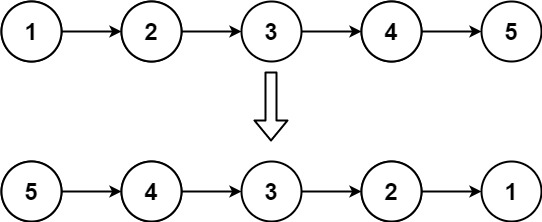

``` python
Input: head = [1,2,3,4,5]
Output: [5,4,3,2,1]
```

**아이디어**
- 초기 head node의 다음 노드가 null일 때까지
    - 초기 head node의 다음 노드를 새로운 head로 지정한다.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return 
        
        old_head = head
        while old_head.next:
            curr = head
            head = old_head.next
            old_head.next = old_head.next.next
            head.next = curr
        
        return head

### Remove Linked List Elements

Given the head of a linked list and an integer val, remove all the nodes of the linked list that has Node.val == val, and return the new head.

- 주어진 Linked List 의 Head와 정수에 대하여, Node.val == 정수인 Node들을 삭제하여라

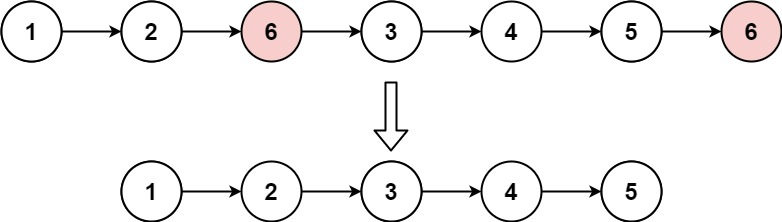

``` python
Input: head = [1,2,6,3,4,5,6], val = 6
Output: [1,2,3,4,5]
```

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        dummy_head = ListNode(-1, head)
        
        current_node = dummy_head
        while current_node.next != None:
            if current_node.next.val == val:
                current_node.next = current_node.next.next
            else:
                current_node = current_node.next
                
        return dummy_head.next

### Odd Even Linked List

Given the head of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return the reordered list.

The first node is considered odd, and the second node is even, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in O(1) extra space complexity and O(n) time complexity.


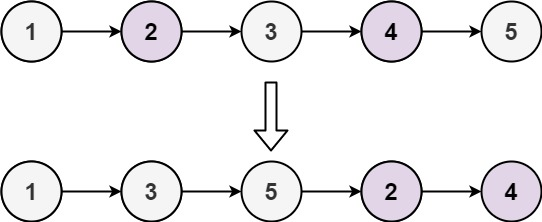

- Example
``` python
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]
```

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def oddEvenList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        dummy_head = ListNode(0, head)
        new_node = ListNode(0, None)
        
        current_node = dummy_head
        current_new_node = new_node
        
        i = 0
        
        while current_node.next:
            if i % 2 == 1:
                current_new_node.next = ListNode(current_node.next.val, None)
                current_new_node = current_new_node.next
                current_node.next = current_node.next.next
                i += 1
            # 개수가 짝수일때, current_node가 마지막에 None이 됨
            if current_node.next:
                current_node = current_node.next
            i += 1
        
        current_node.next = new_node.next
        
        return dummy_head.next

### Palindrome Linked List

Given the head of a singly linked list, return true if it is a palindrome.

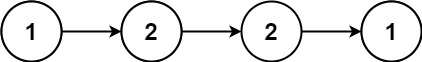

- Example
``` python
Input: head = [1,2,2,1]
Output: true
```

In [ ]:
import collections

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        q = collections.deque()
        
        if not head:
            return True
        
        node = head
        
        # deque로 변환
        while node:
            q.append(node.val)
            node = node.next
            
        # 팰린드롬 판별
        while len(q) > 1:
            if q.popleft() != q.pop():
                return False
            
        return True